In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Students Performance in Exams - Statistical Analysis

In [3]:
Students_Performance = pd.read_csv("/content/StudentsPerformance.csv")
Students_Performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
Students_Performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
Students_Performance.shape

(1000, 8)

In [6]:
Students_Performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1.	Descriptive Statistics

In [7]:
df = pd.DataFrame(Students_Performance, columns=['math score', 'reading score', 'writing score'])
min_value = df.min()
mean = df.mean()
mode = df.mode()
median = df.median()
standard_deviation = df.std()
max_value = df.max()
six_number_summary = [mean, mode, median, standard_deviation, min_value, max_value]
print('six_number_summary:\n', six_number_summary)

six_number_summary:
 [math score       66.089
reading score    69.169
writing score    68.054
dtype: float64,    math score  reading score  writing score
0          65             72             74, math score       66.0
reading score    70.0
writing score    69.0
dtype: float64, math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64, math score        0
reading score    17
writing score    10
dtype: int64, math score       100
reading score    100
writing score    100
dtype: int64]


observation from min & max values shows the outliers.

2.	Identify and Handle Outliers

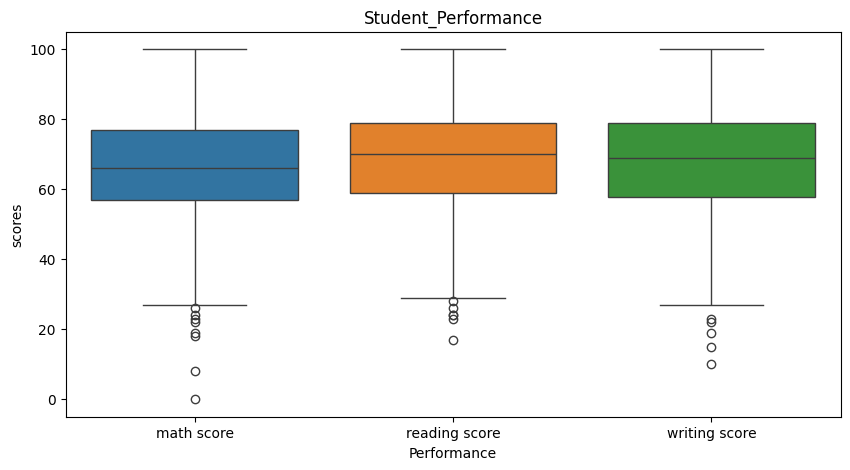

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.title('Student_Performance')
plt.xlabel('Performance')
plt.ylabel('scores')
plt.show()

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print('Q1:\n{}, \nQ3:\n{}'.format(Q1, Q3))
IQR = Q3 - Q1
print('IQR:\n',IQR)

Q1:
math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64, 
Q3:
math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64
IQR:
 math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


In [10]:
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print('Lower_Bound:\n{}, \nUpper_Bound:\n{}'.format(Lower_Bound, Upper_Bound))

Lower_Bound:
math score       27.000
reading score    29.000
writing score    25.875
dtype: float64, 
Upper_Bound:
math score       107.000
reading score    109.000
writing score    110.875
dtype: float64


In [11]:
df_remove = df[(df >= Lower_Bound) & (df <= Upper_Bound)]
print('Removed_outlier:\n', df_remove)

Removed_outlier:
      math score  reading score  writing score
0          72.0           72.0           74.0
1          69.0           90.0           88.0
2          90.0           95.0           93.0
3          47.0           57.0           44.0
4          76.0           78.0           75.0
..          ...            ...            ...
995        88.0           99.0           95.0
996        62.0           55.0           55.0
997        59.0           71.0           65.0
998        68.0           78.0           77.0
999        77.0           86.0           86.0

[1000 rows x 3 columns]


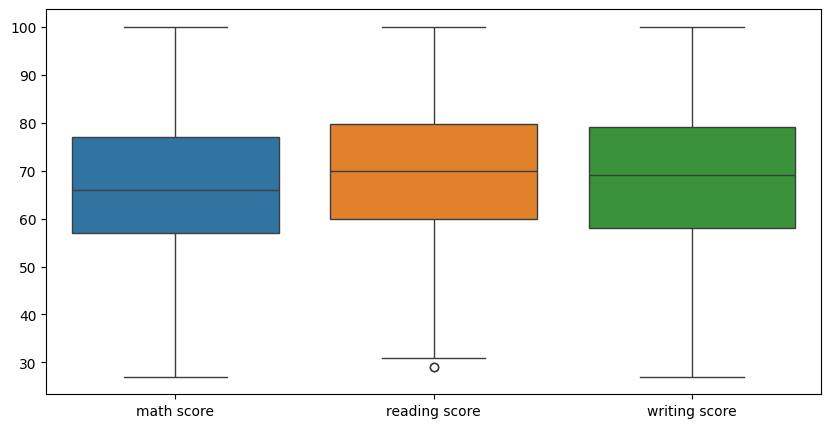

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(df_remove)
plt.show()

3.	Check Distribution and Skewness

<Axes: ylabel='Density'>

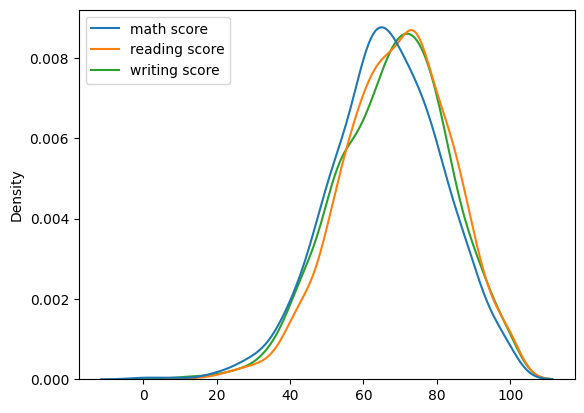

In [13]:
sns.kdeplot(df)

In [14]:
df.skew()

,0
math score,-0.278935
reading score,-0.259105
writing score,-0.289444


From the skewed to left distribution.
skew < 0 (negative) where mode > median > mean.

In [37]:
df = np.log(df)
df.skew()

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,0
math score,-2.284856
reading score,-1.463826
writing score,-2.093943


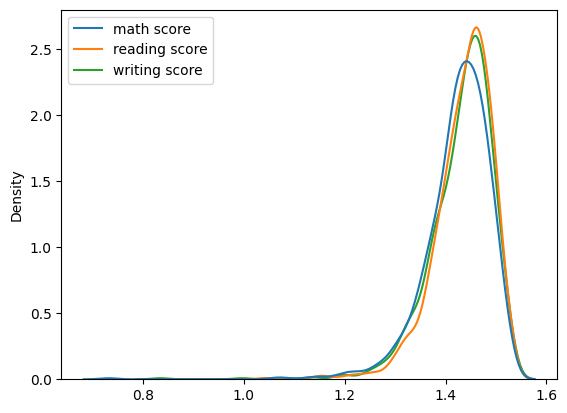

In [38]:
sns.kdeplot(df)
plt.show()

4.	Hypothesis Testing

Formulate Hypotheses -

Null hypothesis(H0):Average math score is same for both students who completed  test preparation course and those who did not.

Alternate hypothesis(H1):Average math score is differs between students who completed the test preparation course those who did not.

Significance Level -

α = 0.05 will be used for the hypothesis test.

In [39]:
from scipy.stats import ttest_ind

T-test Test Statistic & p-value

In [18]:
Students_Performance_none = Students_Performance[Students_Performance["test preparation course"] == "none"]["math score"]
Students_Performance_completed = Students_Performance[Students_Performance["test preparation course"] == "completed"]["math score"]
print("Students_Performance_none:\n", Students_Performance_none)
print("Students_Performance_completed:\n", Students_Performance_completed)

Students_Performance_none:
 0      72
2      90
3      47
4      76
5      71
       ..
992    55
993    62
994    63
996    62
999    77
Name: math score, Length: 642, dtype: int64
Students_Performance_completed:
 1      69
6      88
8      64
13     78
18     46
       ..
990    86
991    65
995    88
997    59
998    68
Name: math score, Length: 358, dtype: int64


In [40]:
from inspect import Attribute
t_stat, p_val = ttest_ind(Students_Performance_none, Students_Performance_completed)
mean_none = Students_Performance_none.mean()
mean_completed = Students_Performance_completed.mean()
print(f"mean_none: {mean_none}")
print(f"mean_completed: {mean_completed}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"p_val: {p_val:.2f}")


mean_none: 64.0778816199377
mean_completed: 69.69553072625699
T-Statistic: -5.70
p_val: 0.00


Decision

In [36]:
alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: math score vary between none and completed.")
else:
  print("Fail to reject the null hypothesis:no significant difference in math score between none and completed.")

Reject the null hypothesis: math score vary between none and completed.


Therefore, p_value is less than alpha to rejecting the null hypothesis(H0) by accepting the alternate hypothesis(H1).

However, the math score vary between test preparation course of none and completed status.